In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation
from lifelines.utils import survival_events_from_table
from lifelines import KaplanMeierFitter

In [2]:
survival = pd.read_csv("C:/Users/Atmaja/Desktop/r1_baseline_new.csv")

In [3]:
survival.head()

,pid,age,gender,ht,wt,bmi,ps,bili,hgb,plt,...,target,egfr,protocolnum,conf_stat,br_stat,ttp_time,os_time,os_stat,max_grade_all,arm
0,9526L,66.0,2,1.59,57.5,22.744353,0.0,1.114286,13.8,197.0,...,1,1,13,2.0,2.0,0.000000,0.952772,0,3.040052,13.02
1,9527L,75.0,1,1.70,84.5,29.238754,0.0,0.293143,10.9,268.0,...,1,1,13,0.0,0.0,2.069815,11.334702,1,3.040052,13.02
2,9529L,53.0,1,1.68,70.0,24.801587,1.0,0.898971,11.3,369.0,...,1,1,13,0.0,0.0,3.548255,18.201232,1,3.040052,13.02
3,9530L,59.0,2,1.70,66.7,23.079585,0.0,0.228571,13.4,268.0,...,1,1,13,1.0,1.0,18.266940,39.655031,0,3.040052,13.02
4,9532L,65.0,1,1.72,77.5,26.196593,0.0,0.742857,12.6,270.0,...,1,1,13,1.0,1.0,18.299795,34.036961,0,3.040052,13.02


In [5]:
df = pd.DataFrame(survival)
#df.drop(df.columns[[0]], axis=1, inplace=True)  

survival['os_stat'] = survival.os_stat.astype(float)        #change datatype
survival['os_stat'].dtype

survival['gender'] = survival.gender.astype(float)        #change datatype
survival['gender'].dtype

survival['protocolnum'] = survival.protocolnum.astype(float)        #change datatype
survival['protocolnum'].dtype

del df['ang']         
del df['pid'] 
del df['target'] 
del df['egfr']         #delete 'ang','target','pid','egfr'
survival.dtypes

age              float64
gender           float64
ht               float64
wt               float64
bmi              float64
ps               float64
bili             float64
hgb              float64
plt              float64
wbc              float64
anc              float64
ldh              float64
alk              float64
cea              float64
mindia           float64
maxdia           float64
sumdia           float64
numtumors        float64
braf             float64
kras             float64
rectum           float64
colon            float64
lef              float64
rig              float64
ln               float64
peritoneal       float64
lung             float64
liver            float64
tstage           float64
nstage           float64
mstage           float64
rt               float64
surg             float64
surg_met         float64
surg_pt          float64
chemo            float64
protocolnum      float64
conf_stat        float64
br_stat          float64
ttp_time         float64


In [37]:
cph = CoxPHFitter()
cph.fit(survival, duration_col='os_time', event_col='os_stat',show_progress=True)#same values for 0.1,0.5 stpsize only no.of step vary
cph.print_summary()

Iteration 1: norm_delta = 194.28719, step_size = 0.95000, ll = -16153.25811, newton_decrement = 640.82006, seconds_since_start = 0.7
Iteration 2: norm_delta = 7.16476, step_size = 0.23750, ll = -15516.36244, newton_decrement = 78.37843, seconds_since_start = 1.5
Iteration 3: norm_delta = 3.78560, step_size = 0.21375, ll = -15483.38489, newton_decrement = 52.99571, seconds_since_start = 2.2
Iteration 4: norm_delta = 3.16972, step_size = 0.30780, ll = -15463.08343, newton_decrement = 36.41676, seconds_since_start = 2.9
Iteration 5: norm_delta = 1.54250, step_size = 0.44323, ll = -15444.00716, newton_decrement = 19.97371, seconds_since_start = 3.6
Iteration 6: norm_delta = 0.55896, step_size = 0.63825, ll = -15430.10259, newton_decrement = 7.30643, seconds_since_start = 4.3
Iteration 7: norm_delta = 1.51145, step_size = 0.91909, ll = -15423.67729, newton_decrement = 1.17117, seconds_since_start = 5.0
Iteration 8: norm_delta = 0.35402, step_size = 0.93100, ll = -15422.50019, newton_decreme

In [38]:
X = survival.drop(["os_time", "os_stat"], axis=1)
cph.predict_partial_hazard(X)
cph.predict_survival_function(X)
cph.predict_survival_function(X, times=[5., 25., 50.])

,0,1,2,3,4,5,6,7,8,9,...,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888
5.0,0.798310,0.789777,0.788257,0.989083,0.986006,0.952887,0.988691,0.943536,0.852245,0.984248,...,0.712735,0.956265,0.886299,0.937648,0.854532,0.931854,0.935984,0.935066,0.884444,0.820328
25.0,0.054533,0.047467,0.046301,0.867837,0.833608,0.536222,0.863405,0.472100,0.126859,0.814617,...,0.012611,0.561296,0.210408,0.435440,0.131327,0.401945,0.425562,0.420204,0.204791,0.077491
50.0,0.000377,0.000259,0.000242,0.681014,0.610650,0.184702,0.671630,0.130789,0.003714,0.573677,...,0.000007,0.209057,0.014634,0.105058,0.004079,0.084570,0.098723,0.095391,0.013600,0.000976


In [39]:
cph = CoxPHFitter()
scores = k_fold_cross_validation(cph, survival, 'os_time', event_col='os_stat', k=3)
print(scores)
print(np.mean(scores))
print(np.std(scores))      #k fold cross validation evaluates on testing set using concordance measure

[0.7402218213067054, 0.7503026725233383, 0.7432263898757323]
0.7445836279019252
0.004225909102018179


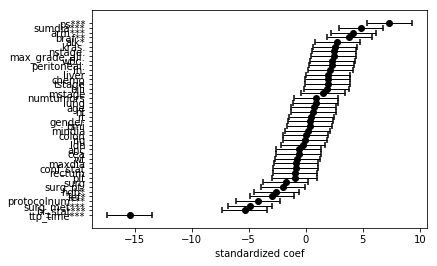

In [41]:
cph.plot(50)   #plot of variables with the range 
               # bracket values displays the variables within the range mentioned, no value implies largest range shown]]

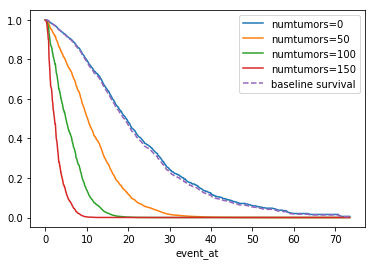

In [42]:
cph.plot_covariate_groups('numtumors', [0, 50, 100, 150]) #varies one variable keeping rest constant with time

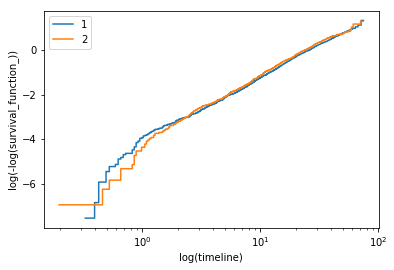

In [7]:
d_0 = df.loc[df['gender'] == 1]
d_1 = df.loc[df['gender'] == 2]

kmf0 = KaplanMeierFitter()
kmf0.fit(d_0['os_time'], event_observed=d_0['os_stat'])

kmf1 = KaplanMeierFitter()
kmf1.fit(d_1['os_time'], event_observed=d_1['os_stat'])

fig, axes = plt.subplots()
kmf0.plot_loglogs(ax=axes)
kmf1.plot_loglogs(ax=axes)
axes.legend([1, 2])

plt.show()                          #doesnt follow propotional hazard assmpt

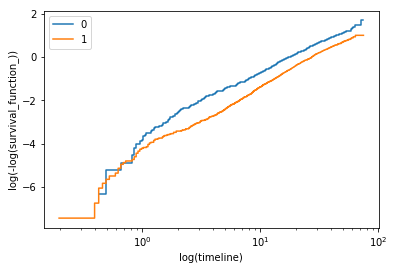

In [8]:
d_0 = df.loc[df['surg'] == 0]
d_1 = df.loc[df['surg'] == 1]

kmf0 = KaplanMeierFitter()
kmf0.fit(d_0['os_time'], event_observed=d_0['os_stat'])

kmf1 = KaplanMeierFitter()
kmf1.fit(d_1['os_time'], event_observed=d_1['os_stat'])

fig, axes = plt.subplots()
kmf0.plot_loglogs(ax=axes)
kmf1.plot_loglogs(ax=axes)
axes.legend([0, 1])

plt.show()                         #doesnt follow proportional hazard assmpt